<a href="https://colab.research.google.com/github/Aman-Agrawal01/Quantum-Stuffs/blob/main/Missing_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 2 Missing Number**
From a function that has as a parameter a vector of positive integers of size 2^n -1, which is missing a number, this vector can be disordered, to search for the missing number from a quantum circuit.



```
def missing_number(Optional[list,array, str]: input_vector):
     “””
input_vector: List, array or string that contain integer values of size 2^n -1, where are missing a number to obtain all the number 2^n 
Return the positive integer value that is missing in the input.
     “””

     # use a framework that works with quantum circuits, qiskit, cirq, pennylane, etc. 
      # define a quantum circuit to convert the vector in a quantum circuit
     # define an oracle to find the missing value
    # encoding the output value in an integer value

# consider print your quantum circuit,

```

Example:
```
A =  missing_number([2,0,1])
print(A)
3
```



Importing Necessary Libraries 


In [1]:
import time
import qiskit
import numpy as np
from qiskit.circuit.library import Diagonal
from qiskit.quantum_info import Statevector

A classical Algorithm that finds the missing number 

In [2]:
def missing_number_classical(input_vector):
  size = len(input_vector)
  for i in range(size+1):
    if i in input_vector :
      continue
    else :
      return i

In [3]:
input_vector = np.random.choice(range(8), 7, replace=False)

print("Vector is ",input_vector)
print("Missing Number is",missing_number_classical(input_vector))

Vector is  [3 5 0 4 1 6 7]
Missing Number is 2


To find the missing number, I have used a quantum subroutine known as amplitude amplification. Created an oracle that gives us access to the function. The function gives true value if input is the missing number else false. Mathematically, it is as show below - <br> <br>
$\begin{equation}
f(x) :=
    \begin{cases}
        1 & \text{if } x \text{ is the missing element}\\
        0 & \text{otherwise}
    \end{cases}
\end{equation}$
<br> <br>
The Oracle $O_f$ to this function gives a negative phase to the missing element state while other states remain as it is.  <br> <br>
$
O_f := \begin{bmatrix}
(-1)^{f(0)} & 0 & 0 & . & 0 \\
0 & (-1)^{f(1)} & 0 & . & 0 \\
. & 0 &  & . & 0 \\
. & . & . & . & . \\
0 & 0 & 0 & . &  (-1)^{f(2^n-1)}\\
\end{bmatrix}
$ <br> <br>
where $2^n - 1$ is the size of the vector. After this, we add an amplitude amplification gates which amplifies the amplitude of the missing number. So, in each step or iteration we add oracle followed by the amplification gates. The algorithm takes nearly $\lfloor \frac{\pi}{4}2^{n/2} ⌋$ steps or iterations.

In [4]:
def missing_number_quantum(input_vector):
 
  if (len(input_vector) & len(input_vector) + 1 != 0) or (len(input_vector)==0):
    print("ERROR - Length of the vector is not of form 2^n - 1")
    return

  """Transforming the integer array to corresponding binary valued arrays with fixed lengths
    Example - [2,1,0] -> ['10','01','00'] """
  num_qubits = int(np.log2(len(input_vector)+1))
  binary_input_vector = list()
  for i in range(len(input_vector)):
    binary_input_vector.append(bin(input_vector[i]).replace('0b','').zfill(num_qubits))

  """ Creating Oracle which results in adding a negative phase to the solution states """
  mark_state = Statevector.from_label(bin(missing_number_classical(input_vector)).replace('0b','').zfill(num_qubits))
  oracle = Diagonal((-1)**mark_state.data) 

  " Creating the Quantum Circuit "
  qc = qiskit.QuantumCircuit(num_qubits+1,num_qubits)

  " Equal superposition in the first n qubits and |-> state in auxiliary/ancilia bit"
  qc.x([num_qubits])
  qc.h([i for i in range(num_qubits+1)])
  qc.barrier()

  " Grover search requires pi*sqrt(n)/4 steps/iterations "
  steps = int(np.pi*np.sqrt(2**num_qubits)/4)

  for n in range(steps):

    qc.append(oracle,range(num_qubits))

    qc.barrier()

    "Adding the Amplification"
    qc.h(range(num_qubits))
    qc.x(range(num_qubits))
    qc.mcx([i for i in range(num_qubits)],num_qubits)
    qc.x(range(num_qubits))  
    qc.h(range(num_qubits))

    qc.barrier()

  qc.measure(range(num_qubits),range(num_qubits))

  aer_sim = qiskit.Aer.get_backend('aer_simulator')
  circuit = qiskit.transpile(qc, aer_sim)
  qobj = qiskit.assemble(circuit)
  results = aer_sim.run(qobj).result()
  counts = results.get_counts()

  return int(max(counts, key=counts.get),2),qc.draw(output='mpl')

In [5]:
print("Missing number according to Amplitude Amplification is",missing_number_quantum(input_vector)[0])
print("Does both the method gives same results ? - ", missing_number_quantum(input_vector)[0] == missing_number_classical(input_vector))

Missing number according to Amplitude Amplification is 2
Does both the method gives same results ? -  True


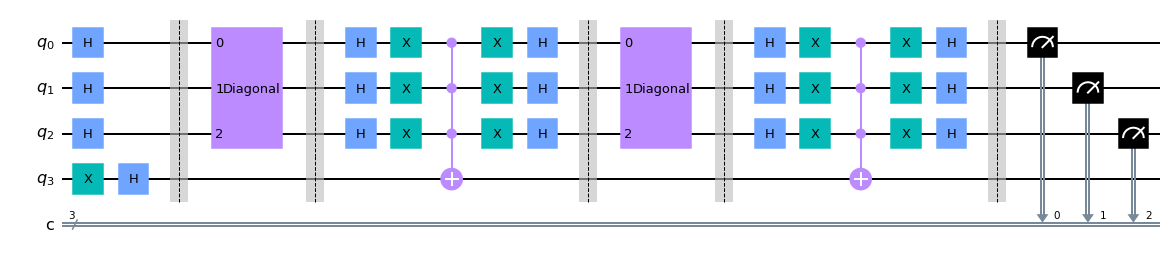

In [6]:
missing_number_quantum(input_vector)[1]

## BONUS 
Which is the largest list that can be implemented? Identify it and describe the result


I believe the problem is bit ambiguous or incomplete. It should be like which is the largest list that can be implemented **efficiently**. I iterate the size of input vector and noted their time using time library in Python as shown below in the code. It seems like largest list that can be implemented **efficiently** is of size $2^{10} - 1$ which takes around a minute. After that, the system stops responding.


In [7]:
for m in range(2,13):
  n = 2**m
  input_vector = np.random.choice(range(n), n-1, replace=False)
  start_time = time.time()
  missing_number_quantum(input_vector)
  print("m =", m, "takes %s seconds" % (time.time() - start_time))

m = 2 takes 0.13646340370178223 seconds
m = 3 takes 0.3815908432006836 seconds
m = 4 takes 0.5044267177581787 seconds
m = 5 takes 0.9400908946990967 seconds
m = 6 takes 2.053861141204834 seconds
m = 7 takes 8.007193803787231 seconds
m = 8 takes 11.547483205795288 seconds
m = 9 takes 28.79943013191223 seconds
m = 10 takes 85.22982096672058 seconds
m = 11 takes 233.86596083641052 seconds
m = 12 takes 637.1951313018799 seconds
